In [ ]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

from quantumScarsCheck import *
from quantumScarsPlotting import *
from quantumScarFunctions import *

In [ ]:
# variables
N = 6
wd = 0.642570281124498
tau = 5000
tlist = np.linspace(0, tau, 10000)

args = {"A": 0.1, "omega": wd}
H0, H1, eigenvalues, eigenstates, psi0 = get_scar_ham(N)
H = qt.QobjEvo([H0, [H1, coeff]], args=args)
psi_t = qt.sesolve(H, eigenstates[0], tlist)

qargs = {"A": 0.1, "omega": 2.0}
qH0, qH1 = get_qubit_ham(N)
qpsi0 = qt.tensor([qt.basis(2,0)]*N)
qH = qt.QobjEvo([qH0, [qH1, coeff]], args=qargs)
qpsi_t = qt.sesolve(qH, qpsi0, tlist)

ValueError: not enough values to unpack (expected 5, got 2)

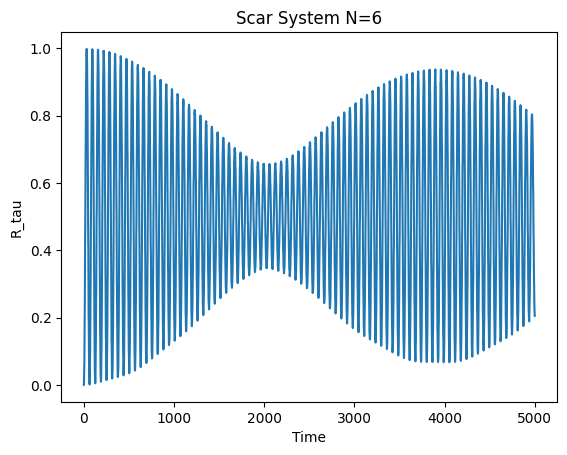

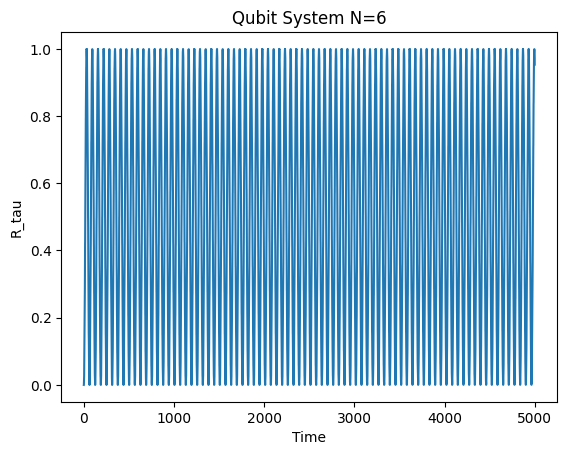

In [11]:
# eq 2.3
expectationEtau = []
H00 = psi_t.states[0].dag() * H0 * psi_t.states[0]
for states in psi_t.states:
    H0tau = states.dag() * H0 * states
    Etau = H0tau - H00
    expectationEtau.append(Etau.real)
expectationEtau = np.array(expectationEtau)

# bandwidth
band = eigenvalues[-1] - eigenvalues[0]

# eq 4.1
Rtau = expectationEtau / band
plt.title(f"Scar System N={N}")
plt.ylabel("R_tau")
plt.xlabel("Time")
plt.plot(tlist, Rtau)
plt.show()

# non interacting qubit
# eq 2.3
qexpectationEtau = []
qH00 = qpsi_t.states[0].dag() * qH0 * qpsi_t.states[0]
for states in qpsi_t.states:
    qH0tau = states.dag() * qH0 * states
    qEtau = qH0tau - qH00
    qexpectationEtau.append(qEtau.real)
qexpectationEtau = np.array(qexpectationEtau)

# bandwidth
qevals, qestates = qH0.eigenstates()
qband = qevals[-1] - qevals[0]

# eq 4.1
qRtau = qexpectationEtau / qband
plt.title(f"Qubit System N={N}")
plt.ylabel("R_tau")
plt.xlabel("Time")
plt.plot(tlist, qRtau)
plt.show()

In [20]:
# eq 2.5
expectationEbar = []
for states in psi_t.states:
    expectationEbar.append(states.dag() * H0 * states)
integral = np.trapezoid(tlist, expectationEbar)
E_bar = integral / tau